In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("sales_data python.csv")
print(df.head())

         Date  Store     Category  Units_Sold  Unit_Price
0  2024-01-01    101  Electronics          30      299.99
1  2024-01-01    102     Clothing          45       49.99
2  2024-01-01    103   Home Goods          20       19.99
3  2024-01-02    101  Electronics          25      299.99
4  2024-01-02    102     Clothing          50       49.99


In [7]:
df.shape

(110, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        110 non-null    object 
 1   Store       110 non-null    int64  
 2   Category    110 non-null    object 
 3   Units_Sold  110 non-null    int64  
 4   Unit_Price  110 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.4+ KB


In [9]:
df.describe()

,Store,Units_Sold,Unit_Price
count,110.000000,110.000000,110.000000
mean,102.018182,35.309091,121.444545
std,0.823751,12.986758,125.711453
min,101.000000,15.000000,19.990000
25%,101.000000,25.250000,19.990000
50%,102.000000,32.000000,49.990000
75%,103.000000,44.250000,299.990000
max,103.000000,62.000000,299.990000


In [10]:
df.columns.tolist()

['Date', 'Store', 'Category', 'Units_Sold', 'Unit_Price']

In [11]:
df.isnull().sum()

Date          0
Store         0
Category      0
Units_Sold    0
Unit_Price    0
dtype: int64

In [12]:
#checking duplicate values 
df.nunique()

Date          19
Store          3
Category       3
Units_Sold    24
Unit_Price     3
dtype: int64

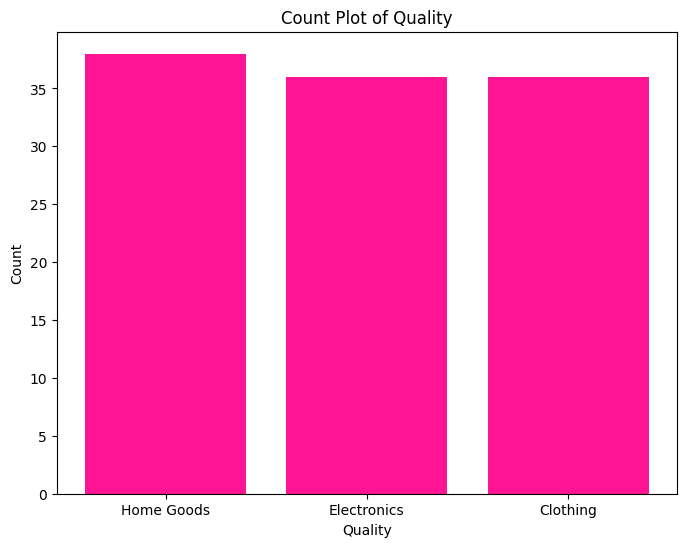

In [19]:
quality_counts = df['Category'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts, color='deeppink')
plt.title('Count Plot of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


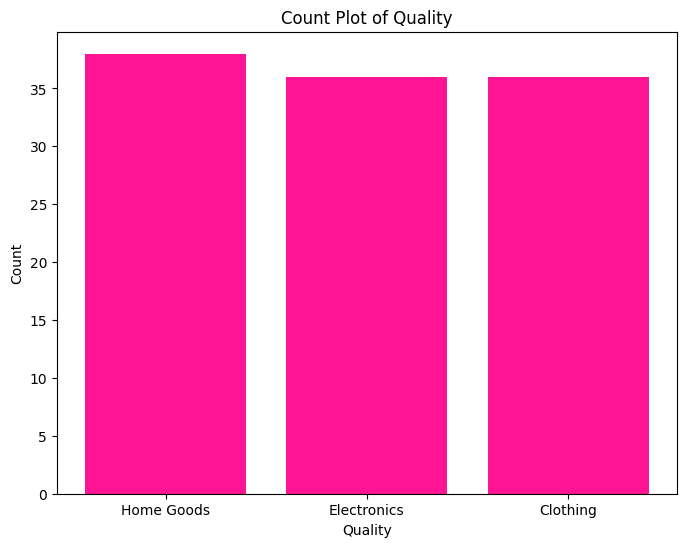

In [20]:
quality_counts = df['Category'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts.values, color='deeppink')

plt.title('Count Plot of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()
